# compare OnBeam BNB data to MC-BNB/DATA cosmic overlay 
This is done by fixing two factors:
1. area-normalizing the overlay to match the OnBeam data
2. reweighting the cosmic in the overlay, to match the OnBeam in the preselection stage

and then studying what happens to the OnBeam/overlay comparison after all cuts

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
pd.set_option('precision', 2)
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8_v9',
    'date': '2018_04_28'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.480008207788 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/'

In [3]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OnBeam']+'_04_'+versions['date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OnBeam']+'_05_'+versions['date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print_and_say("%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume')

OffBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OffBeam']+'_04_'+versions['date']+'_vertices.csv')
                     ,pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OffBeam']+'_05_'+versions['date']+'_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print_and_say("%d"%len(OffBeam)+' pairs from Off-Beam, %d'%len(OffBeamFV)+' in Fiducial Volume')

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['date'],filename=versions['Overlay']+'_'+versions['date']+'_vertices')
print_and_say("%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay')

38199 pairs from On-Beam, 24345 in Fiducial Volume
34730 pairs from Off-Beam, 21107 in Fiducial Volume
28935 pairs from MC-BNB + cosmic DATA overlay
19125 pairs in FV
5069 are 1mu-1p, 26.5%
4364 are other pairs, 22.8%
9692 are cosmic, 50.7%
--------------------------------------------------------------
2404 are CC 1p 0pi, 12.6%
9692 cosmic pairs and 5069 mu-p pairs in overlay


In [4]:
# cuts_pureff = apply_cuts_MCbnbDATAcosmic()
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,do_PIDaCali=True
                                                                   ,cuts_order  = ['no cut','PIDa','flash','length','vertex activity','delta phi','soft Pt'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.5%,100.0%,12.6%,no cut,100.0% (5069),100.0% (4364),100.0% (9692),100.0% (2404)
PIDa,65.4%,54.1%,68.1%,26.7%,PIDa,65.4% (3316),34.6% (1511),13.4% (1301),68.1% (1637)
flash,61.3%,59.7%,63.6%,29.4%,flash,61.3% (3106),33.8% (1474),6.5% (626),63.6% (1530)
length,54.7%,68.0%,57.8%,34.1%,length,54.7% (2771),20.1% (875),4.4% (429),57.8% (1389)
vertex activity,37.5%,70.3%,50.2%,44.6%,vertex activity,37.5% (1902),12.9% (565),2.4% (237),50.2% (1206)
delta phi,24.4%,81.4%,38.1%,60.4%,delta phi,24.4% (1236),3.1% (136),1.5% (146),38.1% (917)
soft Pt,20.9%,88.3%,34.4%,68.8%,soft Pt,20.9% (1061),2.0% (87),0.6% (54),34.4% (827)


# overlay subsamples-scaling

In [5]:
f_Cosmic=0.92
overlay_scalings = dict()
overlay_scalings['only POT'] = get_samples_scaling( N_total='MC(tot) x POT' # total integral of all overlay 
                                      , f_Cosmic=None  # fraction of cosmic in the overlay, need to be in the range 0-1
                                      , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['POT scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total='MC(tot) x POT'  # total integral of all overlay                                       
                                                                         , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                         , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['N(On) scaling'] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                       
                                               , f_Cosmic=None  # fraction of cosmic in the overlay, need to be in the range 0-1
                                               , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                       
                                                                         , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                         , OverlaySubsamples=reducedOverlay['no cut'])
print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'N(On) scaling': {   '1mu-1p': 1.2729411764705882,
                         'CC 1p 0pi': 1.2729411764705882,
                         'cosmic': 1.2729411764705882,
                         'other pairs': 1.2729411764705882},
    'N(On) scaling and f(cosmic)=0.92': {   '1mu-1p': 0.206466659599279,
                                            'CC 1p 0pi': 0.206466659599279,
                                            'cosmic': 2.310916219562526,
                                            'other pairs': 0.206466659599279},
    'POT scaling and f(cosmic)=0.92': {   '1mu-1p': 0.077855672417687996,
                                          'CC 1p 0pi': 0.077855672417687996,
                                          'cosmic': 0.8714139925747616,
                                          'other pairs': 0.077855672417687996},
    'only POT': {   '1mu-1p': 0.48000820778826886,
                    'CC 1p 0pi': 0.48000820778826886,
                    'cosmic': 0.4800082077882

## $l_\mu - l_p$

In [6]:
# # To erase after running on overlay v9 and beamOn/Off data!
# OnBeamFV['l_muCandidate'] = OnBeamFV['l_assigned_muon']
# OffBeamFV['l_muCandidate'] = OffBeamFV['l_assigned_muon']
# OnBeamFV['l_pCandidate'] = OnBeamFV['l_assigned_proton']
# OffBeamFV['l_pCandidate'] = OffBeamFV['l_assigned_proton']

# OnBeamFV['pidcali_PIDaYplane_pCandidate'] = OnBeamFV['PIDa_assigned_proton']
# OnBeamFV['pidcali_PIDaYplane_muCandidate'] = OnBeamFV['PIDa_assigned_muon']
# OffBeamFV['pidcali_PIDaYplane_pCandidate'] = OffBeamFV['PIDa_assigned_proton']
# OffBeamFV['pidcali_PIDaYplane_muCandidate'] = OffBeamFV['PIDa_assigned_muon']

In [7]:
# # To erase after running on overlay v9 and beamOn/Off data!
# OnBeamFV['l_mu-l_p'] = OnBeamFV['l_muCandidate'] - OnBeamFV['l_pCandidate']
# OffBeamFV['l_mu-l_p'] = OffBeamFV['l_muCandidate'] - OffBeamFV['l_pCandidate']

In [8]:
# # To erase after running on overlay v9 and beamOn/Off data!
# for pair_type in pair_types:
#     MCbnbDATAcosmicSamples[pair_type]['l_mu-l_p'] = (MCbnbDATAcosmicSamples[pair_type]['l_muCandidate'] 
#                                                      - MCbnbDATAcosmicSamples[pair_type]['l_pCandidate'])

In [9]:
cuts_order  = ['no cut','PIDa','flash','non-collinearity','vertex activity','delta phi','soft Pt'] 
cuts_labels = ['preselection','PIDa cut','PMT cuts','collinearity cut','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut'] 

reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24283 ,sum of h_stack: 24280.6448407
detection + kinematical cuts : sum of h_OnBeam: 424 ,sum of h_stack: 298.266780958


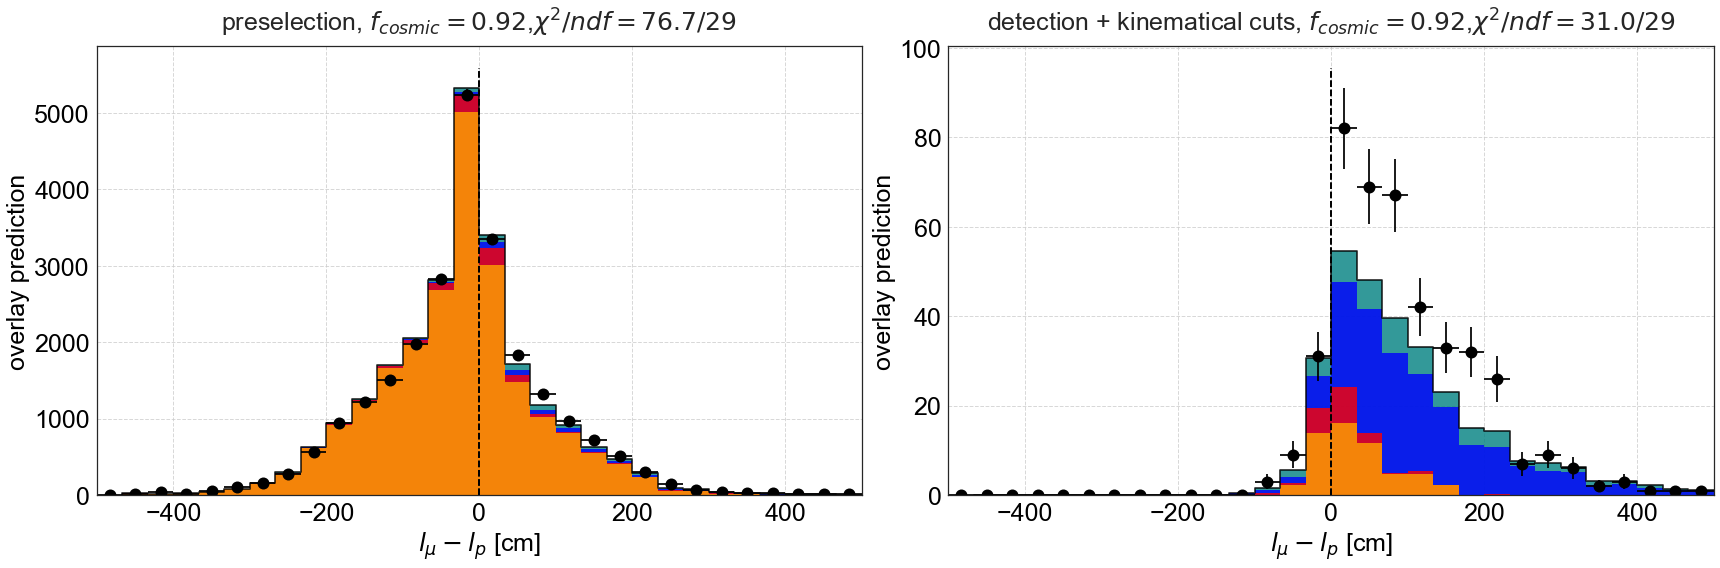

In [10]:
plot_nocut_finalcut(var='l_mu-l_p',x_label= r'$l_{\mu}-l_p$ [cm]',bins=linspace(-500,500,31)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'        
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic,xlim=(-500,500),chi2_xrange=(-200,500),debug=2,x_varcut=(0,0)
                   )

## collinearity

In [11]:
cuts_order  = ['no cut','PIDa','flash','length','vertex activity','delta phi','soft Pt'] 
cuts_labels = ['preselection','PIDa cut','PMT cuts',r'$l_\mu > l_p$ cut','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut'] 

reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24345 ,sum of h_stack: 24345.0
detection + kinematical cuts : sum of h_OnBeam: 467 ,sum of h_stack: 361.813201076


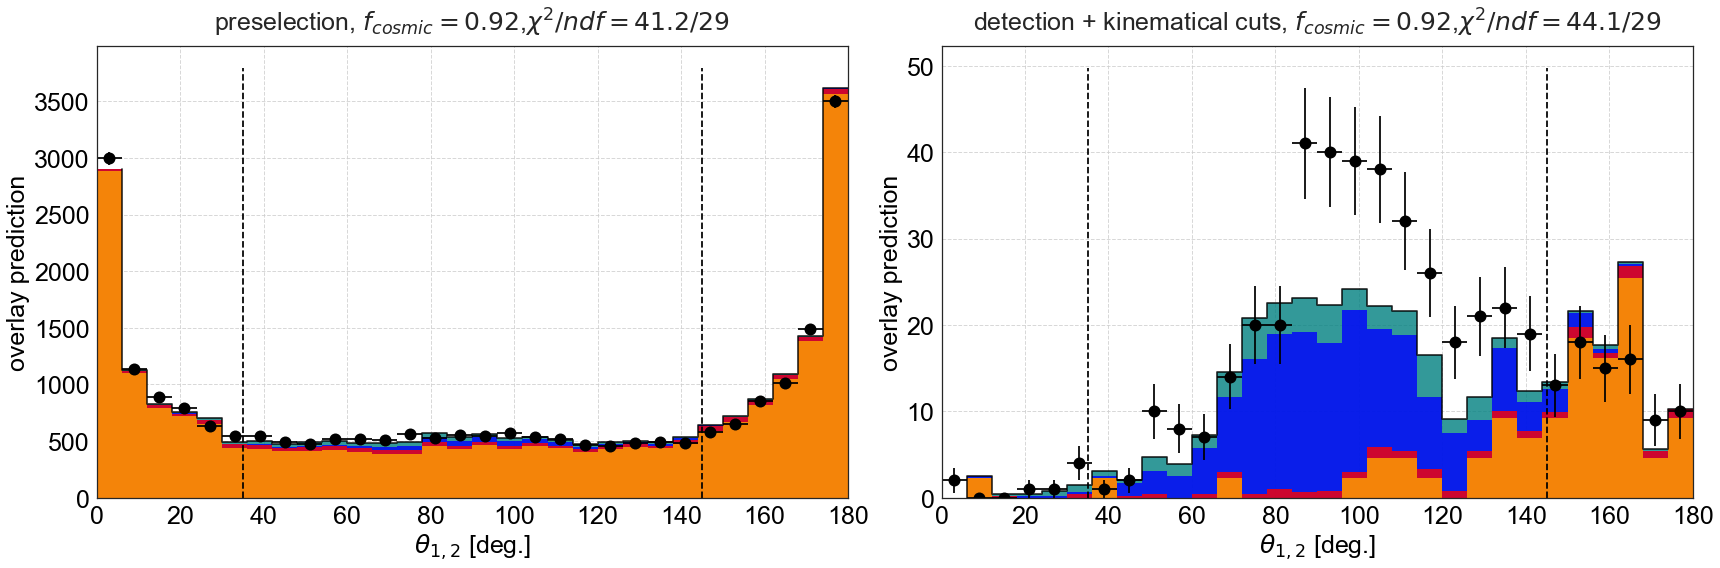

In [12]:
plot_nocut_finalcut(var='theta_12',x_label= r'$\theta_{1,2}$ [deg.]',bins=linspace(0,180,31)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic,xlim=(0,180),chi2_xrange=(0,180),debug=2,x_varcut=(35,145)
                   )

## $\Delta \phi$

In [13]:
cuts_order  = ['no cut','PIDa','flash','length','non-collinearity','vertex activity','soft Pt']
cuts_labels = ['preselection','PIDa cut','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


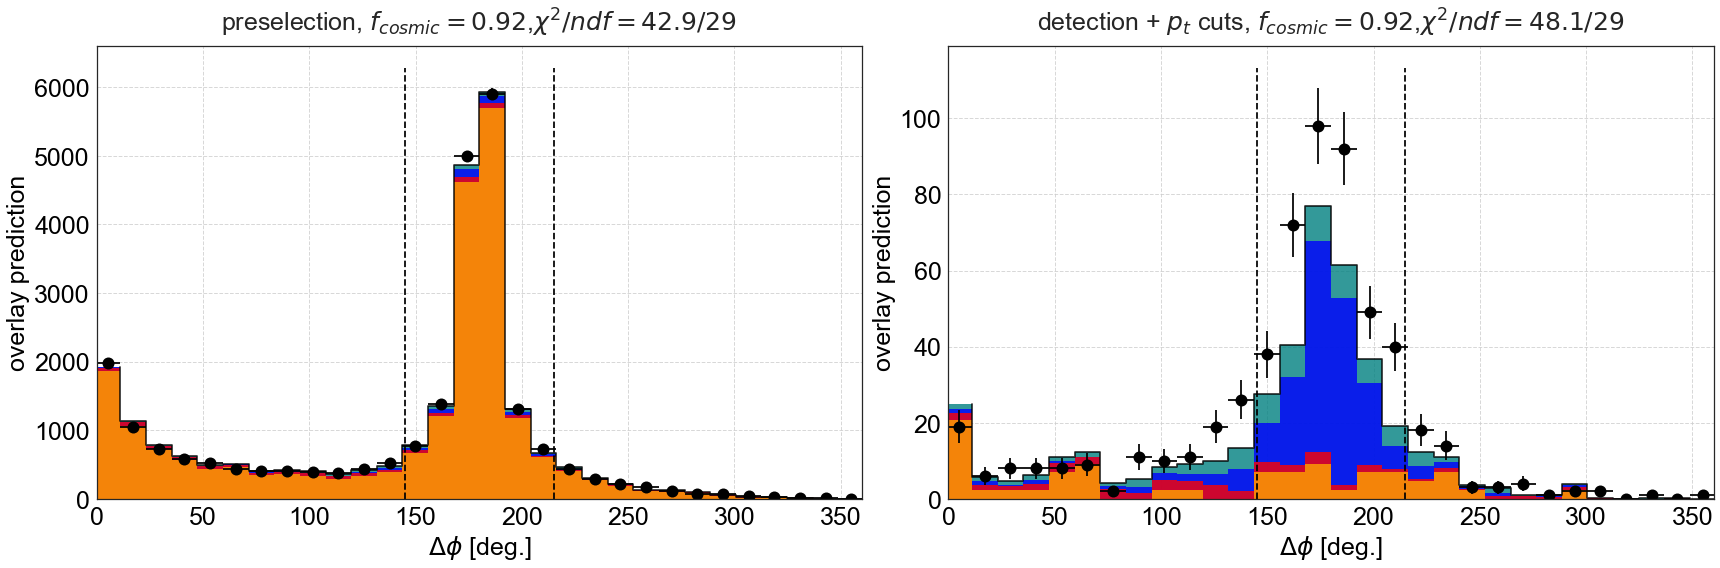

In [14]:
plot_nocut_finalcut(var='delta_phi',x_label=  r'$\Delta \phi$ [deg.]',bins=linspace(-1,361,31),x_varcut=(145,215)
                    ,last_cut_name='soft Pt',last_cut_label='detection + $p_t$ cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,360),chi2_xrange=(0,360)
                   )

## number of PE in closest flash

In [15]:
cuts_order  = ['no cut','PIDa','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PIDa cut',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


In [16]:
OverlaySamples_noFlash = dict()
for pair_type in pair_types:
    OverlaySamples_noFlash[pair_type] = OverlaySamples[pair_type][OverlaySamples[pair_type]['ClosestFlash_TotalPE']<0]
    
reducedOverlay_noFlash,pureffOverlay_noFlash,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples_noFlash,cuts_order=cuts_order)
print 'done applying cuts to overlay for no-flash'

OnBeamFV_noFlash = OnBeamFV[OnBeamFV['ClosestFlash_TotalPE']<0]
OffBeamFV_noFlash = OffBeamFV[OffBeamFV['ClosestFlash_TotalPE']<0]
reducedOnBeam_noFlash,reducedOffBeam_noFlash,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV_noFlash
                                                    ,OffBeamFV=OffBeamFV_noFlash,cuts_order=cuts_order)
print 'done applying cuts to data for no-flash'


OverlaySamples_withFlash = dict()
for pair_type in pair_types:
    OverlaySamples_withFlash[pair_type] = OverlaySamples[pair_type][OverlaySamples[pair_type]['ClosestFlash_TotalPE']>=0]
    
reducedOverlay_withFlash,pureffOverlay_withFlash,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples_withFlash,cuts_order=cuts_order)
print 'done applying cuts to overlay for with-flashes'

OnBeamFV_withFlash = OnBeamFV[OnBeamFV['ClosestFlash_TotalPE']>=0]
OffBeamFV_withFlash = OffBeamFV[OffBeamFV['ClosestFlash_TotalPE']>=0]
reducedOnBeam_withFlash,reducedOffBeam_withFlash,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV_withFlash
                                                    ,OffBeamFV=OffBeamFV_withFlash,cuts_order=cuts_order)
print 'done applying cuts to data for with-flashes'

done applying cuts to overlay for no-flash
done applying cuts to data for no-flash
done applying cuts to overlay for with-flashes
done applying cuts to data for with-flashes


preselection : sum of h_OnBeam: 20935 ,sum of h_stack: 16102.5626368
detection + kinematical cuts : sum of h_OnBeam: 414 ,sum of h_stack: 280.883798588
preselection : sum of h_OnBeam: 2844 ,sum of h_stack: 6902.9605493
detection + kinematical cuts : sum of h_OnBeam: 5 ,sum of h_stack: 10.0695315166


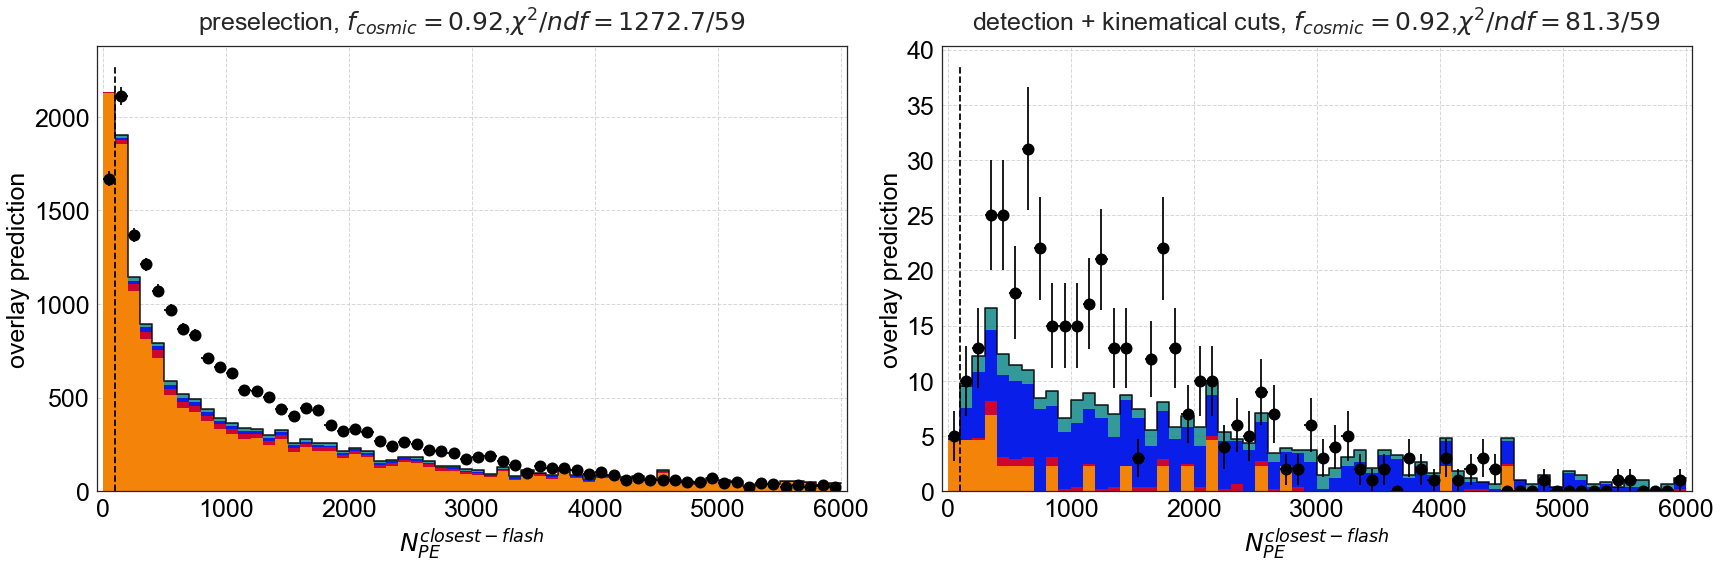

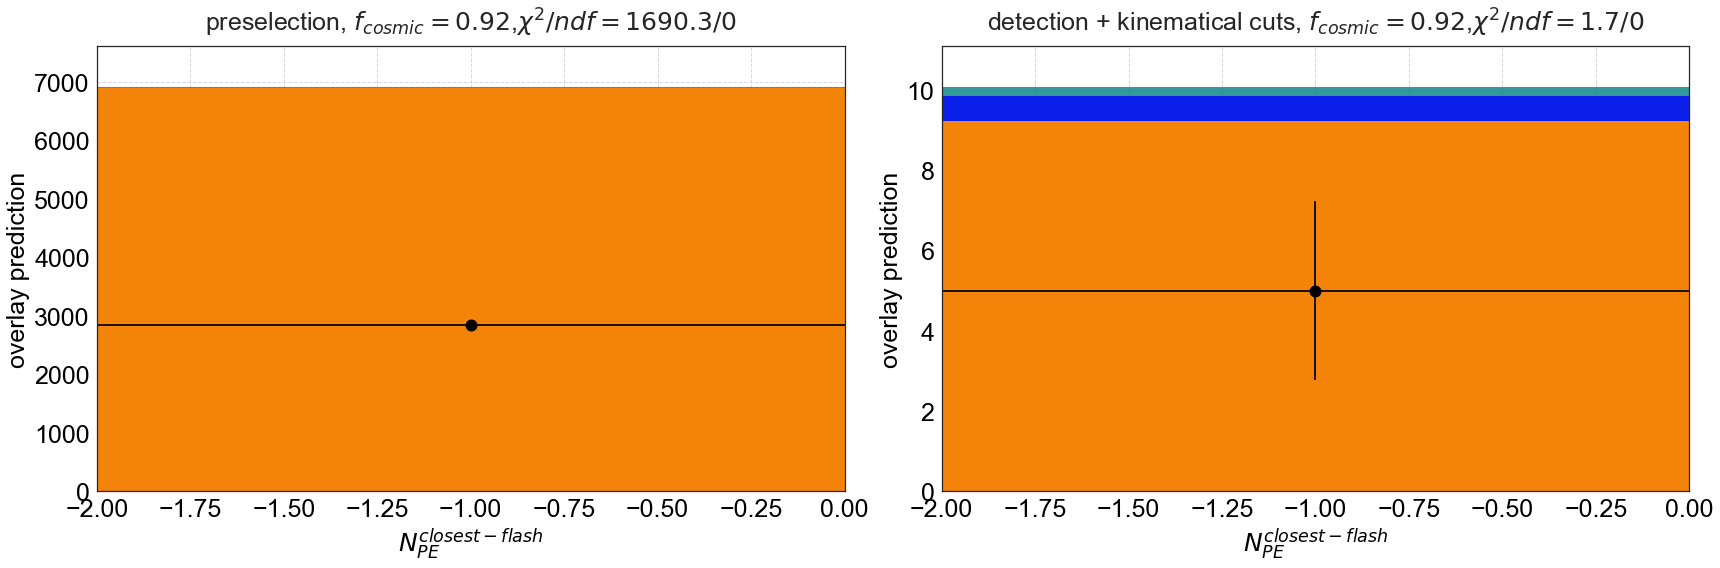

In [17]:
plot_nocut_finalcut(var='ClosestFlash_TotalPE',x_label=  r'$N_{PE}^{closest-flash}$',bins=linspace(-1,6000,61)
                    ,x_varcut=(100,np.inf)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam_withFlash
                    ,reducedOnBeam=reducedOnBeam_withFlash
                    ,reducedOverlay=reducedOverlay_withFlash
                    ,f_Cosmic=f_Cosmic,x_ticks = [0,500,1000,1500]
#                     ,xlim=(0,4500)
                    ,chi2_xrange=(0,4500)
                    ,debug=2
                   )

plot_nocut_finalcut(var='ClosestFlash_TotalPE',x_label=  r'$N_{PE}^{closest-flash}$',bins=linspace(-2,0,2)
                    ,x_varcut=(100,np.inf)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam_noFlash
                    ,reducedOnBeam=reducedOnBeam_noFlash
                    ,reducedOverlay=reducedOverlay_noFlash
                    ,f_Cosmic=f_Cosmic,x_ticks = [0,500,1000,1500]
                    ,chi2_xrange=(-2,0),xlim=(-2,0)
                    ,debug=2
                   )

## $p_t$

In [18]:
cuts_order  = ['no cut','PIDa','flash','length','non-collinearity','vertex activity','delta phi']
cuts_labels = ['preselection','PIDa cut','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


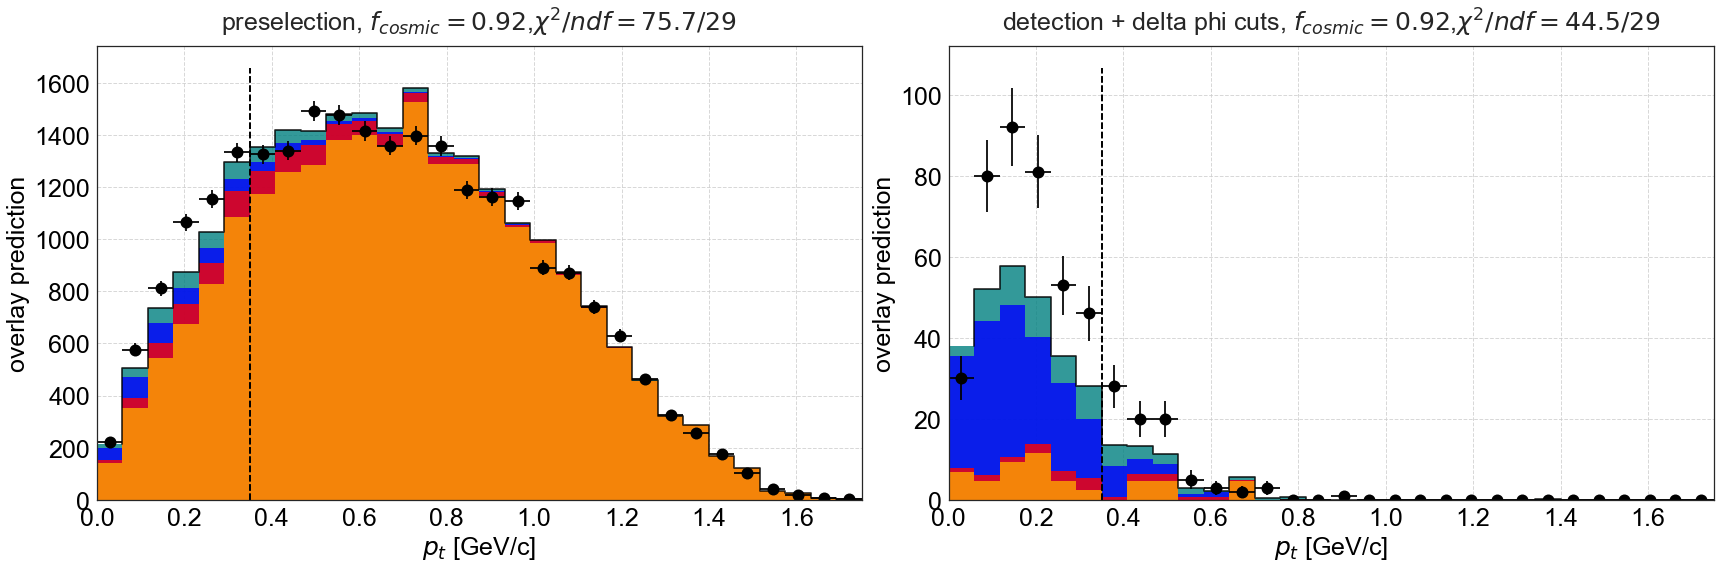

In [19]:
plot_nocut_finalcut(var='reco_Pt',x_label=  r'$p_{t}$ [GeV/c]',bins=linspace(0,1.75,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='delta phi',last_cut_label='detection + delta phi cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.75),chi2_xrange=(0,1)
                   )

## vertex activity

In [20]:
cuts_order  = ['no cut','PIDa','flash','length','non-collinearity','delta phi','soft Pt']
cuts_labels = ['preselection','PIDa cut','PMT cuts',r'$l_\mu > l_p$ cut','collinearity', r'$\Delta \phi$ cut',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


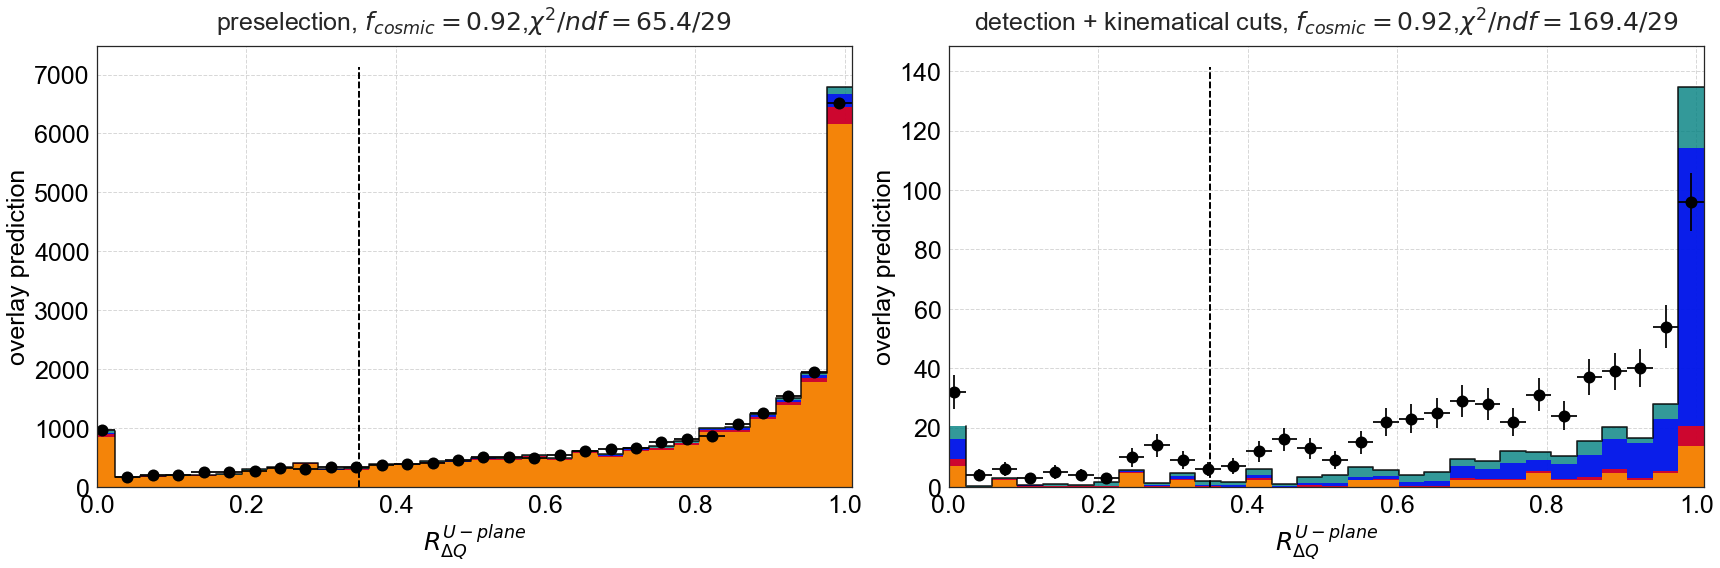

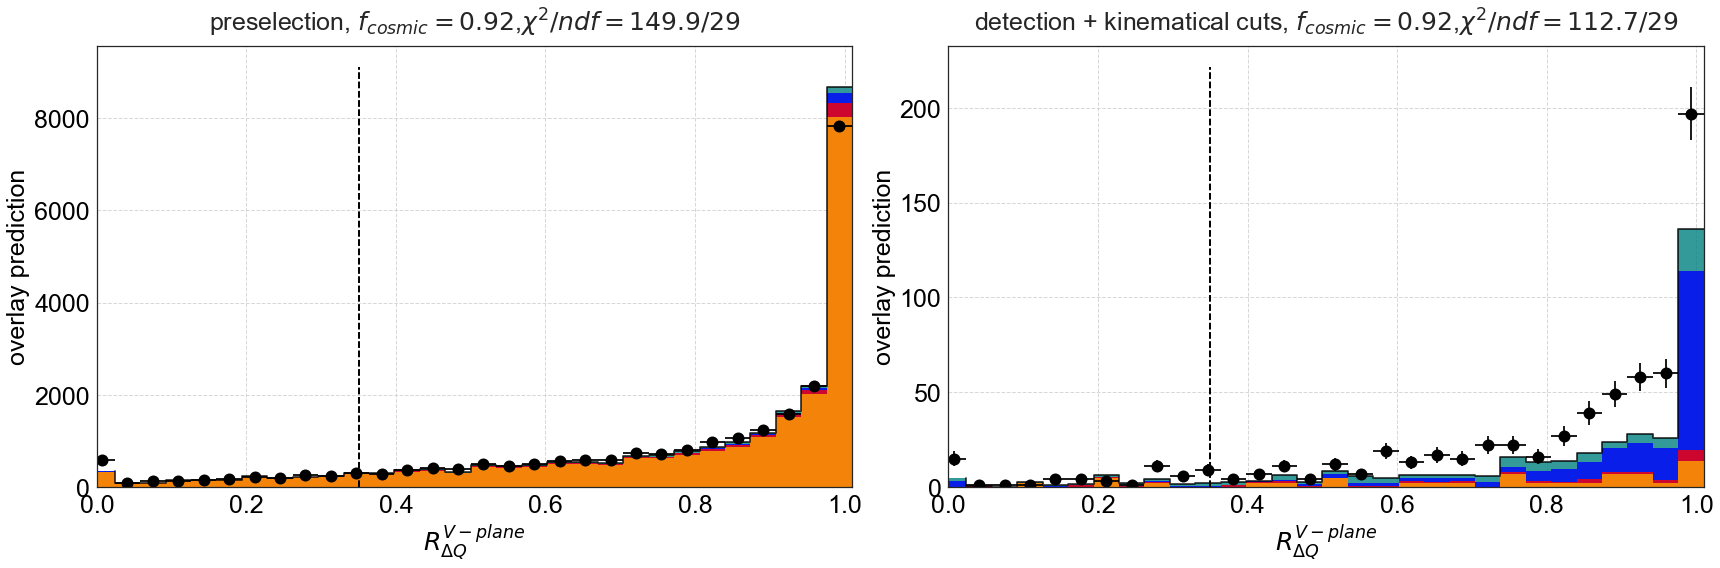

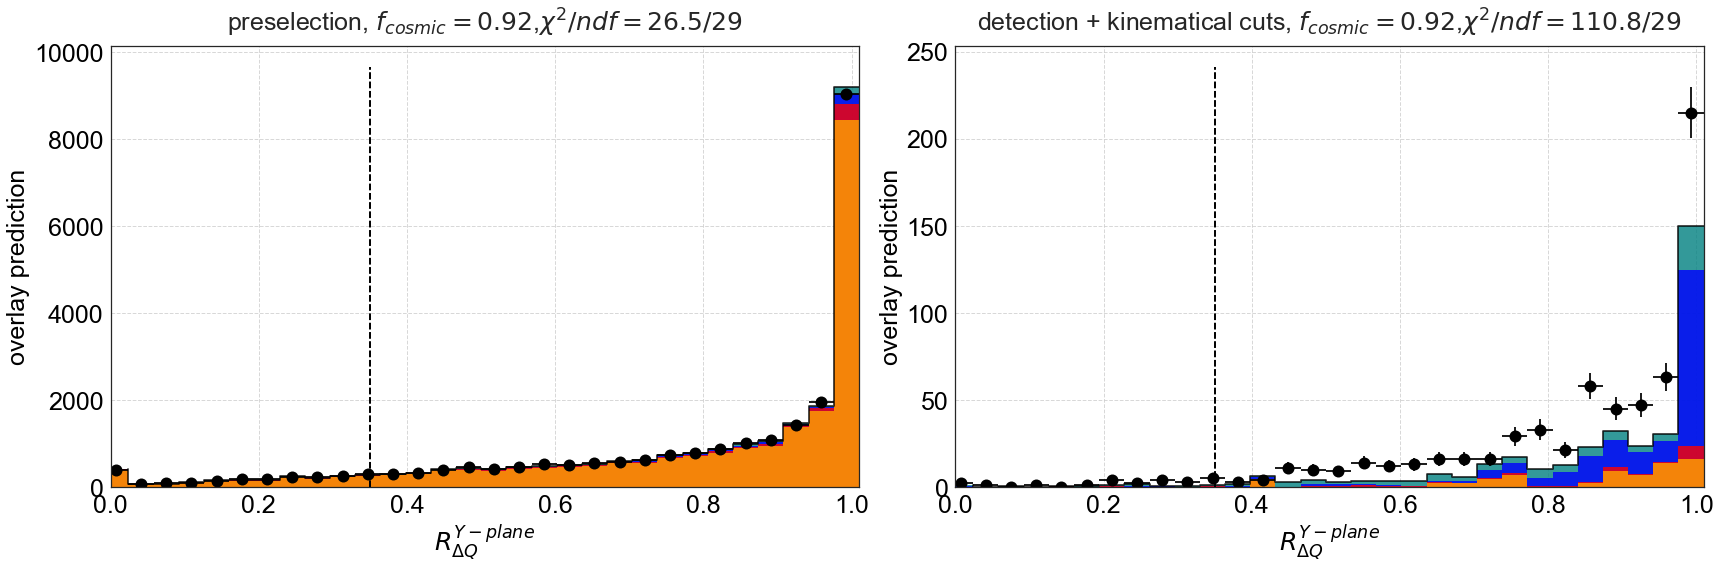

In [21]:
plot_nocut_finalcut(var='RdQaroundVertex[plane 0][50 wires x 100 ticks]',x_label=  r'$R_{\Delta Q}^{U-plane}$'
                    ,bins=linspace(-0.01,1.01,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.01),chi2_xrange=(0,1)
                   )

plot_nocut_finalcut(var='RdQaroundVertex[plane 1][50 wires x 100 ticks]',x_label=  r'$R_{\Delta Q}^{V-plane}$'
                    ,bins=linspace(-0.01,1.01,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.01),chi2_xrange=(0,1)
                   )

plot_nocut_finalcut(var='RdQaroundVertex[plane 2][50 wires x 100 ticks]',x_label=  r'$R_{\Delta Q}^{Y-plane}$'
                    ,bins=linspace(-0.01,1.01,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.01),chi2_xrange=(0,1)
                   )

## PIDa

In [22]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


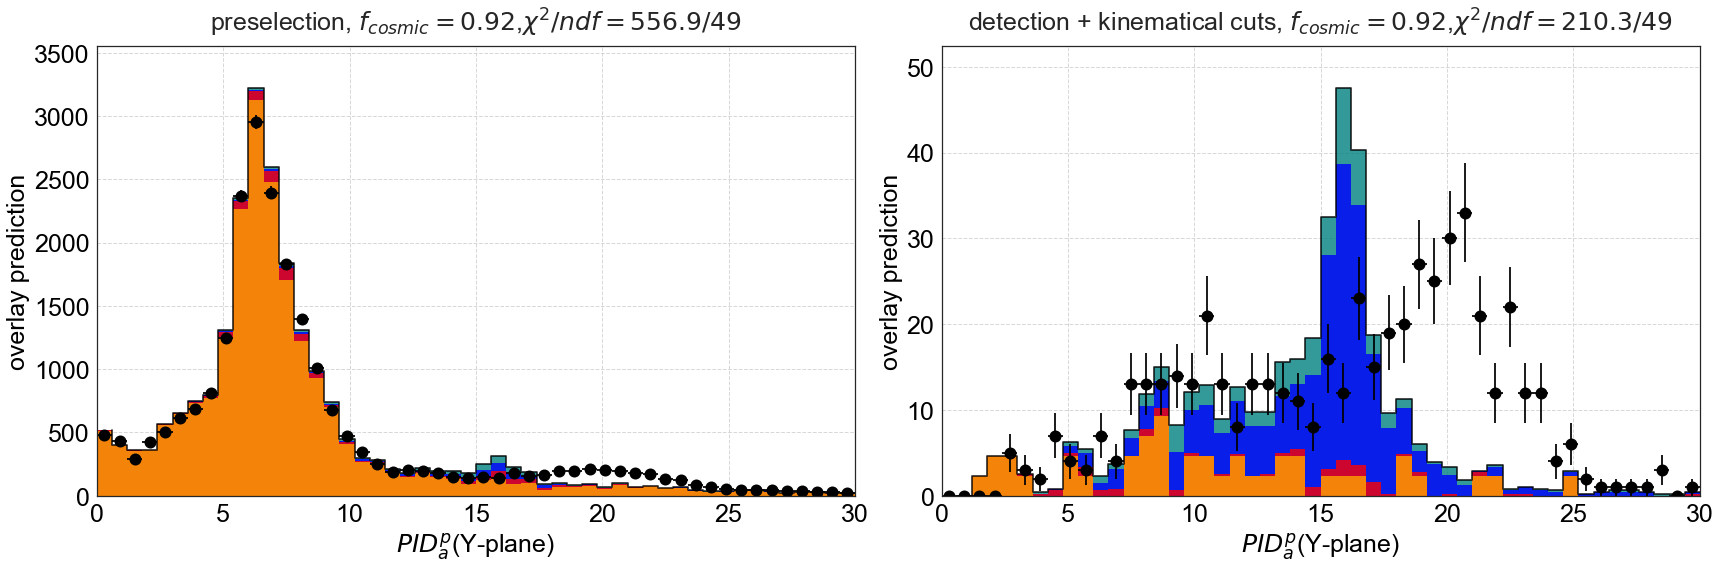

In [33]:
plot_nocut_finalcut(var='pidcali_PIDaYplane_pCandidate',x_label= r'$PID_{a}^{p}$(Y-plane)',bins=linspace(0,30,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,30),chi2_xrange=(5,30)
                   )

# Additional PIDa options: uncalibrated, best plane, etc.

KeyError: 'PIDaCali_assigned_proton'

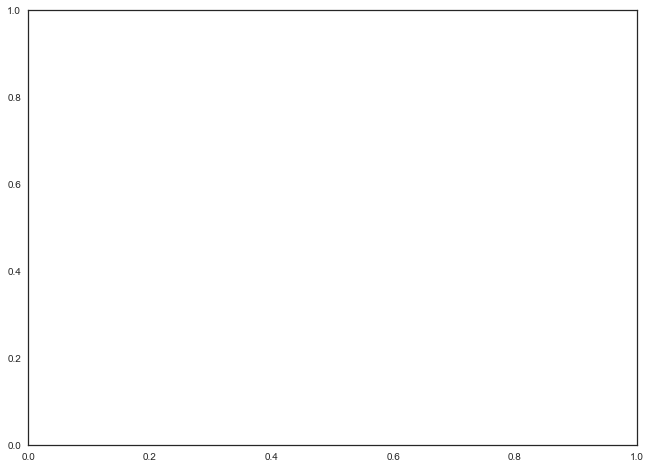

In [24]:
plot_nocut_finalcut(var='PIDaCali_assigned_proton',x_label= r'calibrated $PID_{a}^{p}$',bins=linspace(0,40,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )

In [ ]:
plot_nocut_finalcut(var='PIDaCaliYplane_assigned_proton',x_label= r'calibrated $PID_{a}^{p}$ (Y-plane)',bins=linspace(0,40,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )

In [ ]:
plot_nocut_finalcut(var='pandoraNucalipidCaliYplane_assigned_proton',x_label= r'calibrated $PID_{a}^{p}$ (Y-plane)',bins=linspace(0,40,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )

In [ ]:
plot_nocut_finalcut(var='pandoraNupidCaliYplane_assigned_proton',x_label= r'$PID_{a}^{p}$ (Y-plane)',bins=linspace(0,40,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )

In [ ]:
plot_nocut_finalcut(var='PIDaCali_assigned_proton',x_label= r'calibrated $PID_{a}^{p}$ (Best plane)'
                    ,bins=linspace(0,40,51),x_varcut=(13,25),figsize=(12,8)
                    ,do_only_preselection=True
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/PIDaCali_OnBeam_vs_Overlay.pdf')

In [ ]:
var='PIDaCaliYplane_assigned_proton'
plot_nocut_finalcut(var=var,x_label= r'calibrated $PID_{a}^{p}$ (Y-plane)'
                    ,bins=linspace(0,40,51),x_varcut=(13,25),figsize=(12,8)
                    ,do_only_preselection=True
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/'+var+'_OnBeam_vs_Overlay.pdf')

In [ ]:
var='pandoraNucalipidCaliYplane_assigned_proton'
plot_nocut_finalcut(var=var,x_label= r'calibrated $PID_{a}^{p}$ (Y-plane)'
                    ,bins=linspace(0,40,51),x_varcut=(13,25),figsize=(12,8)
                    ,do_only_preselection=True
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/'+var+'_OnBeam_vs_Overlay.pdf')